In [19]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [20]:

# Load the dataset
car_df = pd.read_csv('Car.csv')

car_df = car_df.dropna()


median_sales = car_df['sales'].median()
car_df['Sales_Category'] = (car_df['sales'] > median_sales).astype(int)  # 1 for High, 0 for Low


X = car_df.drop(['sales', 'Sales_Category'], axis=1)
y = car_df['Sales_Category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Head:")
print(X_train.head())
print("\nTraining Labels Head:")
print(y_train.head())
print("\nTesting Features Head:")
print(X_test.head())
print("\nTesting Labels Head:")
print(y_test.head())


dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Training Features Head:
    Price_in_thousands  Engine_size  Horsepower  Fuel_efficiency
97              41.000          2.3       185.0             27.0
71              37.805          3.0       225.0             23.0
23              24.340          3.8       200.0             25.0
48              17.035          2.5       170.0             25.0
79              13.987          1.8       113.0             30.0

Training Labels Head:
97    0
71    0
23    0
48    1
79    0
Name: Sales_Category, dtype: int64

Testing Features Head:
     Price_in_thousands  Engine_size  Horsepower  Fuel_efficiency
87               16.540          2.0       125.0             30.0
89               22.605          4.6       200.0             21.0
100              35.300          3.2       215.0             20.0
119              19.720          3.4       175.0             25.0
30               22.245          2.7       200.0             26.0

Testing Labels Head:
87     0
89     1
100    0
119    1
30     1
N

In [21]:


file_path = 'Car.csv'  
car_df = pd.read_csv(file_path)


median_sales = car_df['sales'].median()
car_df['Sales_Category'] = (car_df['sales'] > median_sales).astype(int)  # 1 for High, 0 for Low


X = car_df.drop(['sales', 'Sales_Category'], axis=1)  # Drop other non-feature columns if necessary
y = car_df['Sales_Category']

X = X.fillna(X.mean())  # For numerical columns


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy:.2f}')



Model Accuracy: 0.62


In [22]:

dtrees = {
    'max_depth=2': DecisionTreeClassifier(max_depth=2, random_state=42),
    'max_depth=3': DecisionTreeClassifier(max_depth=3, random_state=42),
    'max_depth=4': DecisionTreeClassifier(max_depth=4, random_state=42),
    'max_depth=None': DecisionTreeClassifier(max_depth=None, random_state=42)  # Full depth
}

# Train each Decision Tree
for name, dtree in dtrees.items():
    dtree.fit(X_train, y_train)


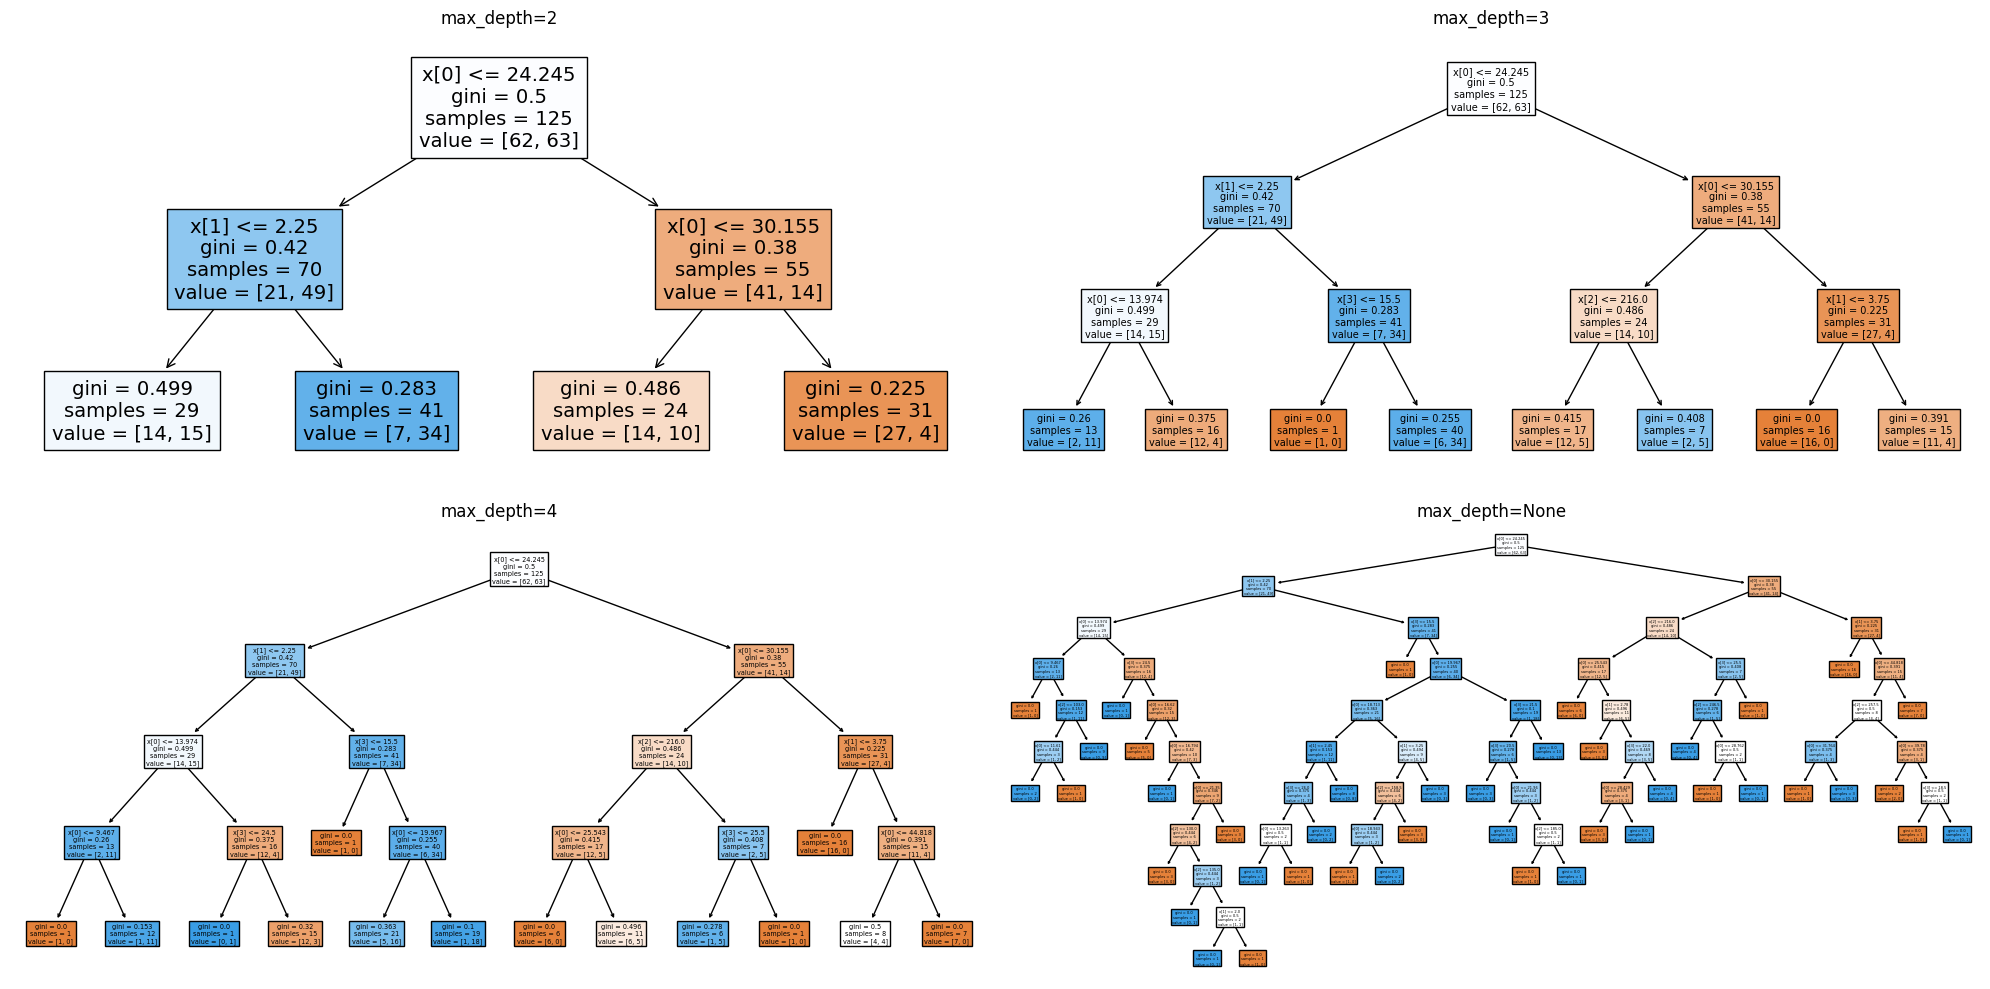

In [23]:


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
for i, (name, dtree) in enumerate(dtrees.items()):
    ax = axes[i // 2, i % 2]
    plot_tree(dtree, ax=ax, filled=True)
    ax.set_title(name)

plt.tight_layout()
plt.show()


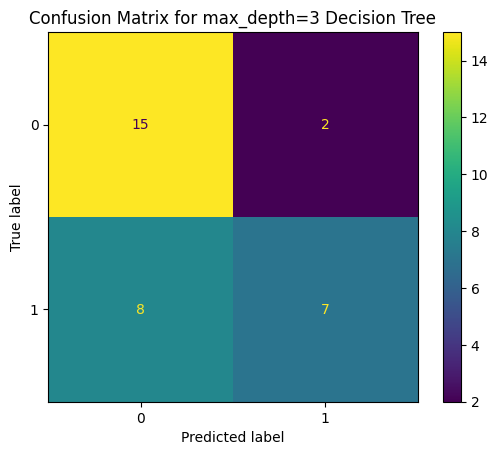

In [24]:

chosen_dtree = dtrees['max_depth=3']


y_pred = chosen_dtree.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
ConfusionMatrixDisplay(conf_matrix).plot(values_format='d')
plt.title('Confusion Matrix for max_depth=3 Decision Tree')
plt.show()


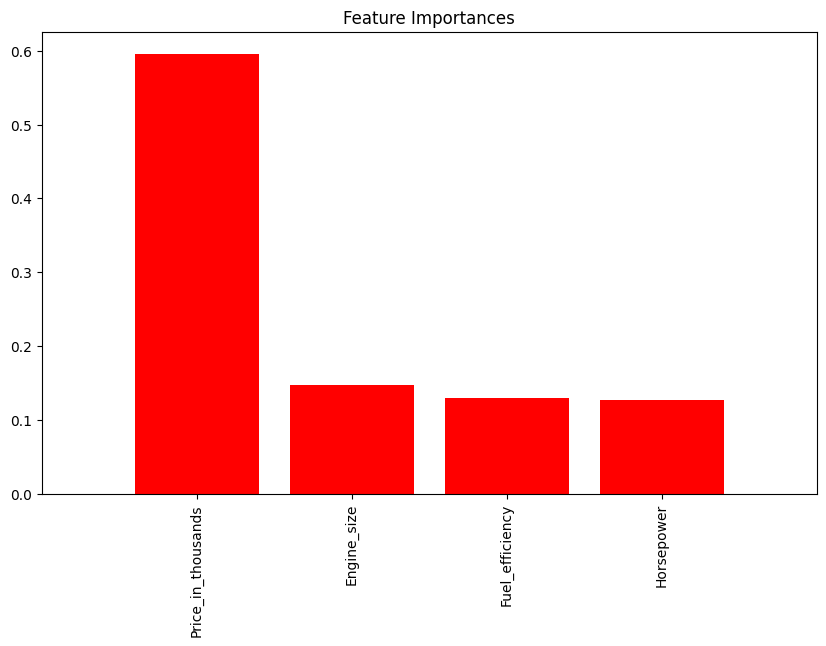

In [25]:


feature_importances = dtree.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
